In [1]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting_and_analysis import plot_utils, summary_plots, spatial_fits, analysis_utils
plot_utils.set_plotting_defaults()

In [2]:
# Load results of the fitting procedure

subject = 1
volume_space=True
fitting_type = 'texture_pyramid_ridge_4ori_4sf_plus_sketch_tokens_stacked'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out, fig_save_folder = analysis_utils.load_fit_results(subject, volume_space, fitting_type, n_from_end=0, root=root, verbose=True)
analysis_utils.print_output_summary(out)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/texture_pyramid_ridge_4ori_4sf_plus_sketch_tokens_stacked/Oct-01-2021_1645_52/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'models', 'n_prf_sd_out', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'stack_result', 'stack_result_lo', 'partial_models_used_for_stack', 'train_r2', 'train_cc', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'pc', 'min_pct_var', 'max_pc_to_retain', 'mult_patch_by_prf', 'map_resolution', 'do_avg_pool', 'feature_info', 'group_all_hl_feats'])
subject = 1
volume_space = 1
fitting_type = pyramid_texture_plus_sketch_tokens
voxel_mask: shape (699192,)
brain_nii_shape: shape (3,)
image_order: shape (7500,)
voxel_index: len 1
voxel_roi: len 2
voxel_ncsnr: shape (699192,)
apertu

In [3]:
from plotting_and_analysis import analysis_utils, spatial_fits

vals_cc = out['stack_result'][4]
vals_r2 = np.sign(vals_cc)*vals_cc**2
bad_voxels = vals_r2<0.01

retlabs, catlabs, ret_group_names, categ_group_names = analysis_utils.get_combined_rois(subject, out)
best_ecc_deg, best_angle_deg, best_size_deg = spatial_fits.get_prf_pars_deg(out, screen_eccen_deg=8.4)

port=33333

names0 = ['pRF eccentricity', 'pRF angle', 'pRF size']
maps0 = [best_ecc_deg, best_angle_deg, best_size_deg]
cmaps0 = ['PRGn', 'Retinotopy_RYBCR', 'PRGn']
mins0 = [0,0,0]
maxes0 = [7, 360, 4]


ve_names = ['Unique var (from concat): LL texture', 'Unique var (from concat): HL texture', 'Unique var (from concat): Sketch tokens']
ppinds = [5, 4, 1]
r2 = out['val_r2']
# r2 = np.sign(out['val_cc'])*out['val_cc']**2
var_expl = r2[:,0:1] - r2[:,ppinds]
max_ind = (np.argmax(var_expl, axis=1)+1).astype(np.float32)
max_ind[bad_voxels] = np.nan

maps1 = [np.sqrt(r2[:,0])] + [max_ind] + [np.sqrt(var_expl[:,fi]) for fi in range(var_expl.shape[1])]
names1 = ['R2 of concat model'] + ['Preferred feature type (based on unique var from concat)'] + ve_names
cmaps1 = ['PuBu', 'plasma_r', 'PuBu', 'PuBu', 'PuBu']
mins1 = [0, 0, 0, 0, 0]
maxes1 = [0.8, 3, 0.1, 0.2, 0.4]

stack_ve_names = ['Unique var (from stack): LL texture', 'Unique var (from stack): HL texture', 'Unique var (from stack): Sketch tokens']
vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
# vals_r2 = np.sign(vals_cc)*vals_cc**2
var_expl = vals_r2[:,0:1] - vals_r2[:,1:]
max_ind = (np.argmax(var_expl, axis=1)+1).astype(np.float32)
max_ind[bad_voxels] = np.nan

max_stack_weight = (np.argmax(out['stack_result'][0], axis=1)+1).astype(np.float32)
max_stack_weight[bad_voxels] = np.nan

maps2 = [np.sqrt(vals_r2[:,0])] + [max_ind] + [max_stack_weight] + [np.sqrt(var_expl[:,fi]) for fi in range(var_expl.shape[1])]
names2 = ['R2 of stacked model'] + ['Preferred feature type (based on unique var from stack)'] + \
                    ['Preferred feature type (max stacking weight)'] + stack_ve_names
cmaps2 = ['PuBu', 'plasma_r', 'plasma_r', 'PuBu', 'PuBu', 'PuBu']
mins2 = [0, 0, 0, 0, 0, 0]
maxes2 = [0.8, 3, 3, 0.1, 0.2, 0.4]

maps = maps0+maps1+maps2
cmaps=cmaps0+cmaps1+cmaps2
names=names0+names1+names2
mins=mins0+mins1+mins2
maxes=maxes0+maxes1+maxes2

plot_utils.plot_maps_pycortex(maps, names, subject, out, fitting_type, port, cmaps=cmaps, mins=mins, maxes=maxes)

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in sqrt


Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333


In [ ]:
plot_utils.set_all_font_sizes(fs = 12)
summary_plots.plot_perf_summary(subject, fitting_type, out, fig_save_folder=fig_save_folder)

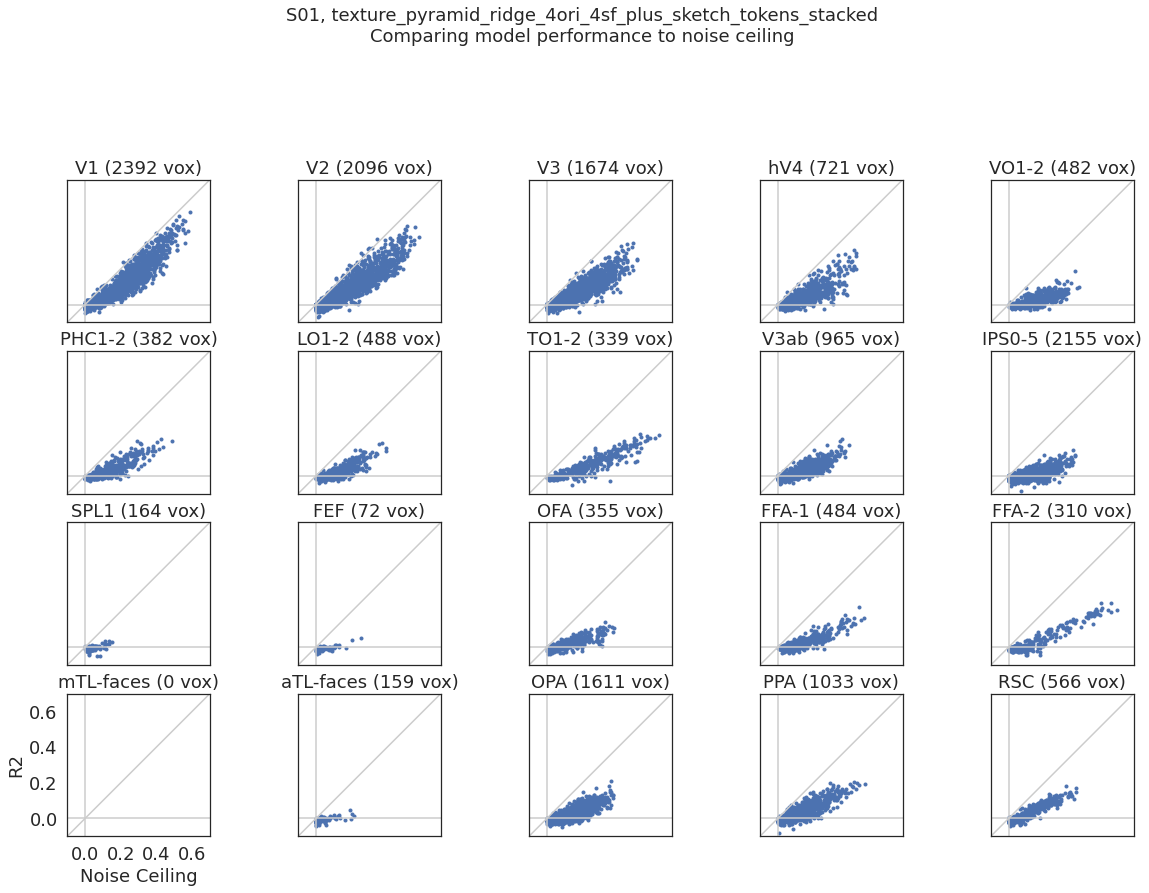

In [52]:
from utils import nsd_utils
plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)
voxel_ncsnr = out['voxel_ncsnr'].ravel()[out['voxel_index'][0]]
noise_ceiling = nsd_utils.ncsnr_to_nc(voxel_ncsnr)/100
# val_r2 = np.sign(out['stack_result'][4])*out['stack_result'][4]**2
val_r2 = out['stack_result'][3]

inds2use = np.ones(np.shape(val_r2))==1

sp = plot_utils.scatter_plot(color=None, xlabel='Noise Ceiling', ylabel='R2', xlims=[-0.1, 0.7], ylims=[-0.1, 0.7], \
                  xticks=[0, 0.2, 0.4, 0.6], yticks=[0, 0.2, 0.4, 0.6],\
                                                        show_diagonal=True, show_axes=True);

if fig_size is None:
    fig_size = (20,18)
plot_utils.create_roi_subplots(np.concatenate([noise_ceiling[:,np.newaxis],val_r2[:,np.newaxis]], axis=1), inds2use, sp, subject, out,\
                    suptitle='S%02d, %s\nComparing model performance to noise ceiling'%(subject, fitting_type), \
                   label_just_corner=True, figsize=fig_size)
plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'r2_vs_noiseceiling.png'))
    plt.savefig(os.path.join(fig_save_folder,'r2_vs_noiseceiling.pdf'))



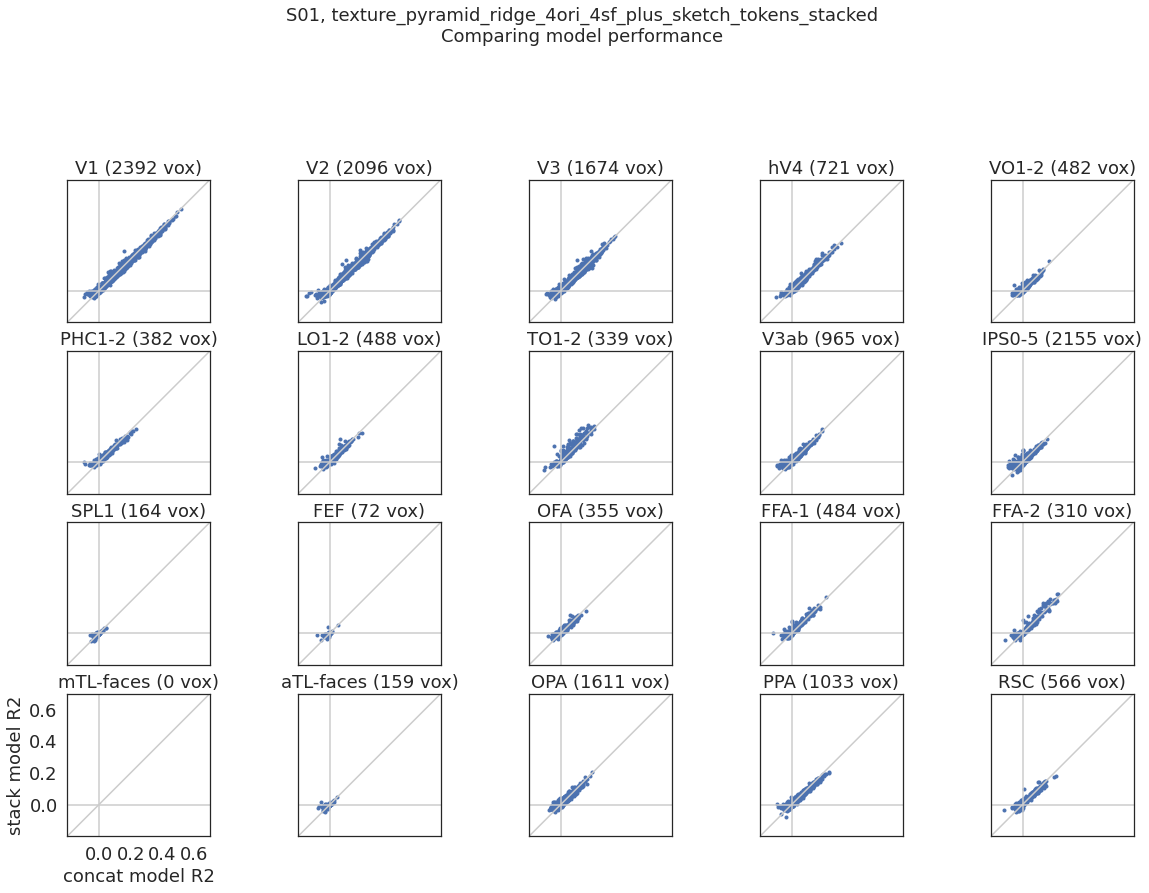

In [54]:
from utils import nsd_utils
plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)
voxel_ncsnr = out['voxel_ncsnr'].ravel()[out['voxel_index'][0]]
noise_ceiling = nsd_utils.ncsnr_to_nc(voxel_ncsnr)/100

concat_val_r2 = out['val_r2'][:,0]
# concat_val_r2 = np.sign(out['val_cc'][:,0])*out['val_cc'][:,0]**2

stack_val_r2 = out['stack_result'][3]
# stack_val_r2 = np.sign(out['stack_result'][4])*out['stack_result'][4]**2

inds2use = np.ones(np.shape(val_r2))==1

sp = plot_utils.scatter_plot(color=None, xlabel='concat model R2', ylabel='stack model R2', xlims=[-0.2, 0.7], ylims=[-0.2, 0.7], \
                  xticks=[0, 0.2, 0.4, 0.6], yticks=[0, 0.2, 0.4, 0.6],\
                                                        show_diagonal=True, show_axes=True);

if fig_size is None:
    fig_size = (20,18)
plot_utils.create_roi_subplots(np.concatenate([concat_val_r2[:,np.newaxis],stack_val_r2[:,np.newaxis]], axis=1), inds2use, sp, subject, out,\
                    suptitle='S%02d, %s\nComparing model performance'%(subject, fitting_type), \
                   label_just_corner=True, figsize=fig_size)

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_stack_vs_concat.png'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_stack_vs_concat.pdf'))



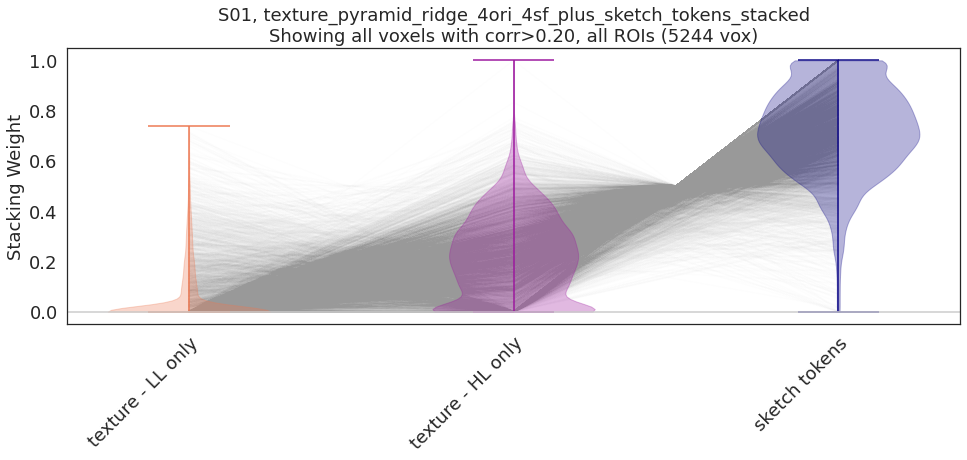

In [55]:
# Stacking weights across all ROIs - violin plot.

plot_utils.set_all_font_sizes(fs = 18)

stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

stacking_weights = out['stack_result'][0]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)+1))[0:-1]
colors = np.flipud(colors)

# inds2use = np.ones(np.shape(stacking_weights)[0])==1
cc_cutoff = 0.20
inds2use = out['stack_result'][4]>cc_cutoff

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='Stacking Weight', \
                 title='S%02d, %s\nShowing all voxels with corr>%.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=None)
vp.create(data=stacking_weights[inds2use,:], new_fig=True)

plt.plot(stacking_weights[inds2use,:].T,'-',color=[0.6, 0.6, 0.6],zorder=-100, alpha=0.01)
    
plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_violin_allrois.png'))
    


In [13]:
0.1**2

0.010000000000000002

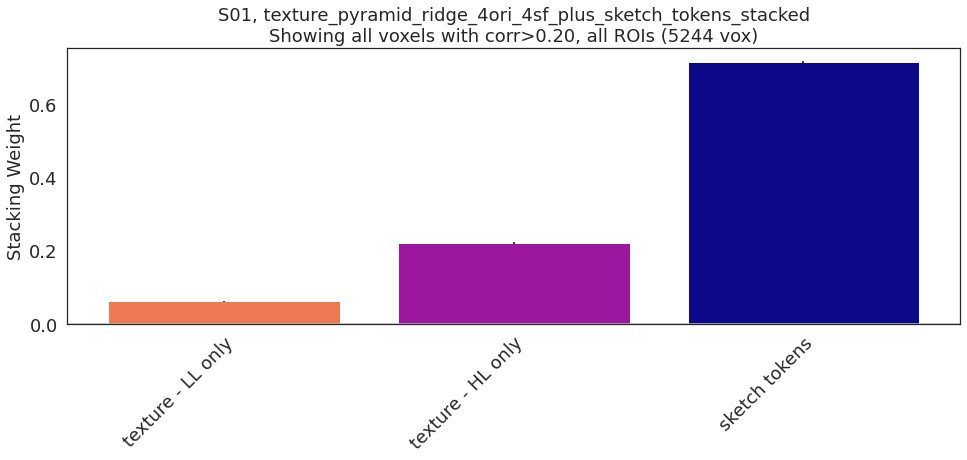

In [56]:
plot_utils.set_all_font_sizes(fs = 18)

stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

stacking_weights = out['stack_result'][0]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)+1))[0:-1]
colors = np.flipud(colors)

cc_cutoff = 0.20
inds2use = out['stack_result'][4]>cc_cutoff

bp = plot_utils.bar_plot(colors=colors, column_labels=stacking_names, ylabel='Stacking Weight', \
                 title='S%02d, %s\nShowing all voxels with corr>%.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=None)
bp.create(data=stacking_weights[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_bar_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_bar_allrois.png'))
    


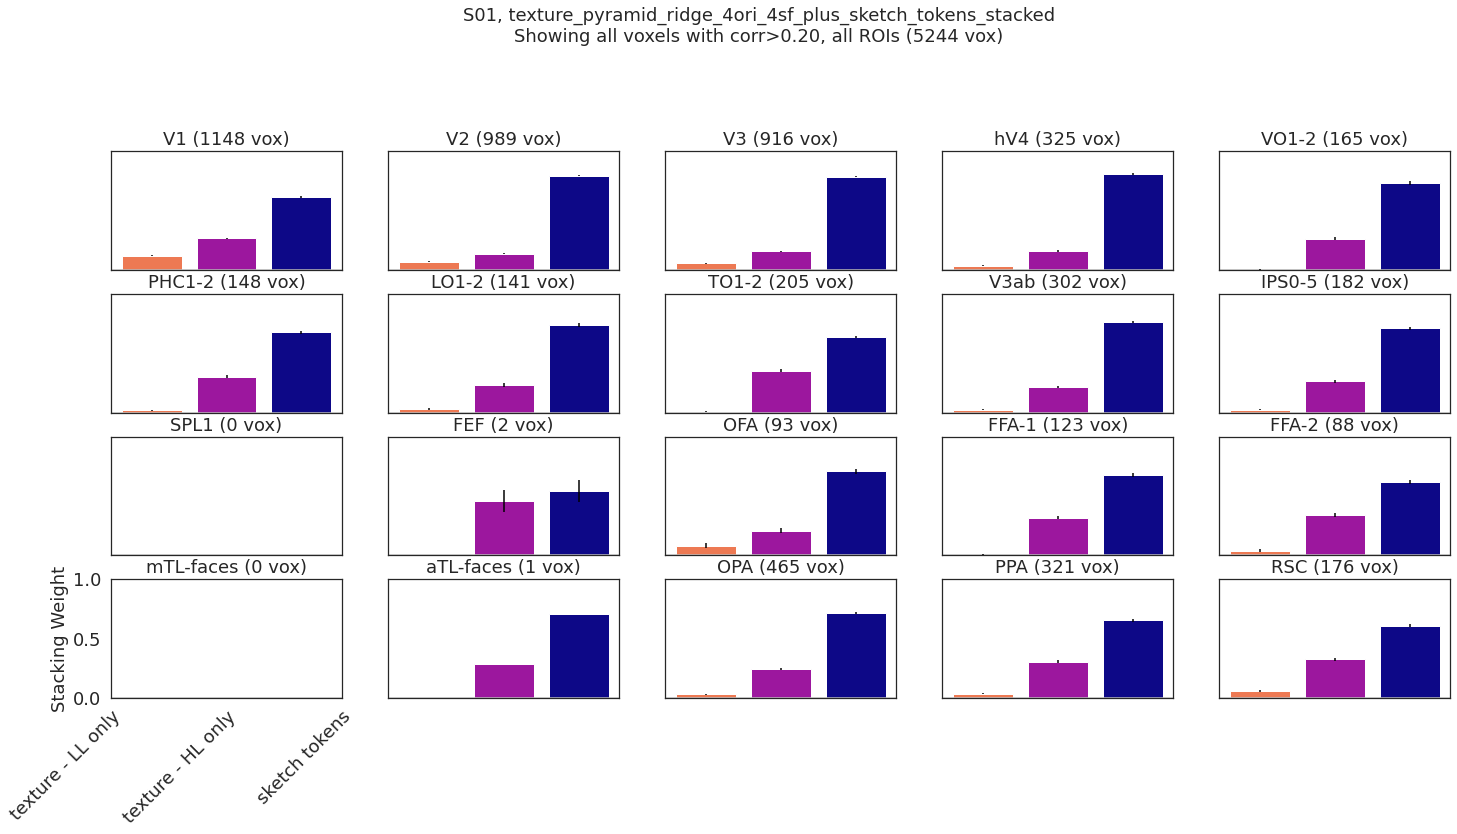

In [41]:
# Stacking weights broken down by ROIs.

plot_utils.set_all_font_sizes(fs = 18)

stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']
stacking_weights = out['stack_result'][0]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)+1))[0:-1]
colors = np.flipud(colors)

cc_cutoff = 0.20
inds2use = out['stack_result'][4]>cc_cutoff

bp = plot_utils.bar_plot(colors=colors, column_labels=stacking_names, ylabel='Stacking Weight', \
                                                        horizontal_line_pos=0, ylims=[0,1])

plot_utils.create_roi_subplots(stacking_weights, inds2use, bp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels with corr>%.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_bar_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_bar_eachroi.png'))
    


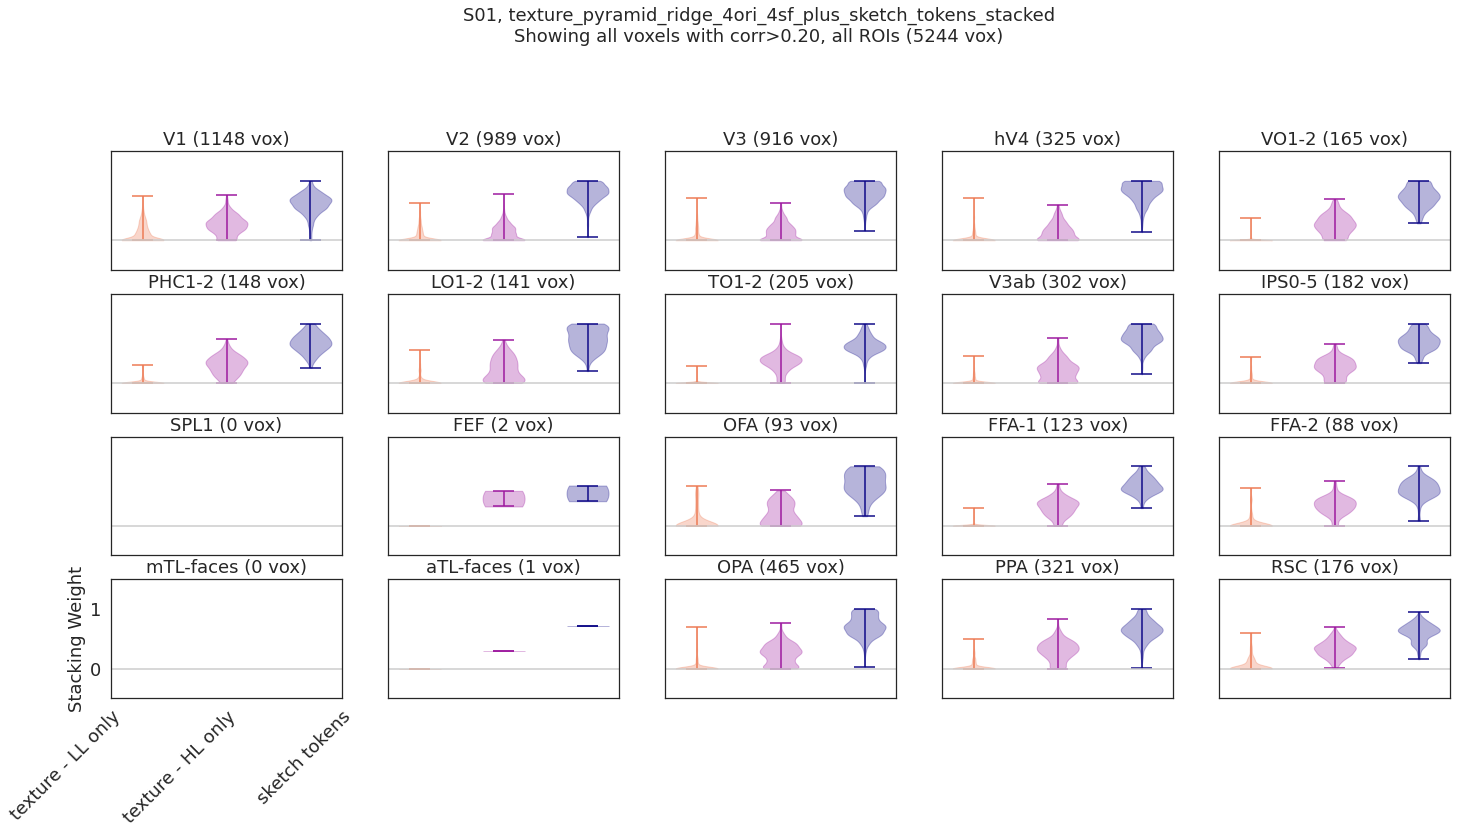

In [42]:
plot_utils.set_all_font_sizes(fs = 18)

stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']
stacking_weights = out['stack_result'][0]

colors = cm.plasma(np.linspace(0,1,len(stacking_names)+1))[0:-1]
colors = np.flipud(colors)

cc_cutoff = 0.20
inds2use = out['stack_result'][4]>cc_cutoff

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='Stacking Weight', \
                                                        horizontal_line_pos=0, ylims=[-0.5,1.5])

plot_utils.create_roi_subplots(stacking_weights, inds2use, vp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels with corr>%.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_violin_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_violin_eachroi.png'))
    


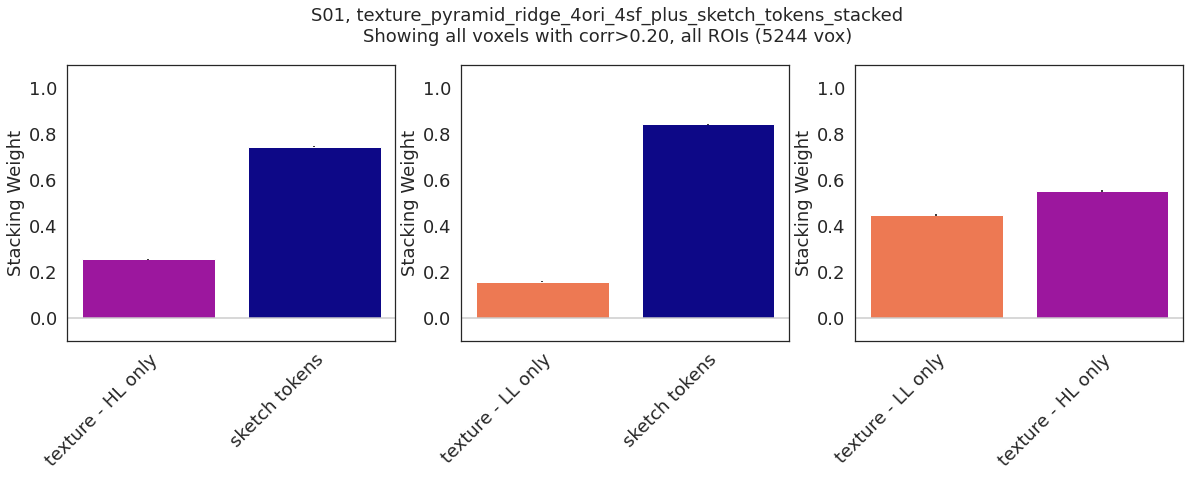

In [59]:
# Stacking weights: leave one out

plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

plt.figure(figsize=(20,8))
colors = cm.plasma(np.linspace(0,1,len(stacking_names)+1))[0:-1]
colors = np.flipud(colors)

for lo in range(3):
    
    plt.subplot(1,3,lo+1)
    
    ppinds_use = list(np.copy(ppinds))
    ppinds_use.remove(ppinds_use[lo])
    stacking_names_use = list(np.copy(stacking_names))
    stacking_names_use.remove(stacking_names[lo])
#     stacking_names = [out['partial_version_names'][ppinds_use[ii]] for ii in range(len(ppinds_use))]

    stacking_weights = out['stack_result_lo'][lo][0]

    colors_use = np.copy(colors)
    colors_use = np.delete(colors_use, lo, axis=0)
  
    cc_cutoff = 0.20
    inds2use = out['stack_result'][4]>cc_cutoff

    bp = plot_utils.bar_plot(colors=colors_use, column_labels=stacking_names_use, ylabel='Stacking Weight',
                                                            horizontal_line_pos=0, ylims=[-0.1, 1.1], )
                            
    bp.create(data=stacking_weights[inds2use,:], new_fig=False)

#     plt.plot(stacking_weights[inds2use,:].T,'-',color=[0.8, 0.8, 0.8],zorder=-100, alpha=0.01)
    
plt.suptitle('S%02d, %s\nShowing all voxels with corr>%.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)));
    
plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_leaveout.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_leaveout.png'))



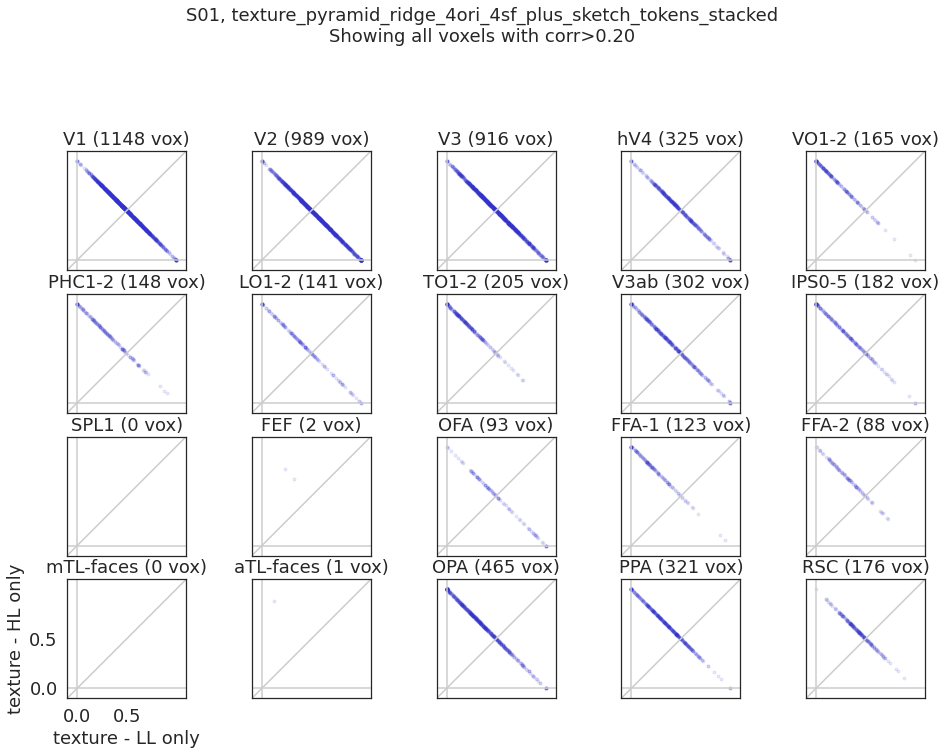

In [60]:

ppinds = out['partial_models_used_for_stack']
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

lo = 2

ppinds_use = list(np.copy(ppinds))
ppinds_use.remove(ppinds_use[lo])
stacking_names_use = list(np.copy(stacking_names))
stacking_names_use.remove(stacking_names[lo])

stacking_weights = out['stack_result_lo'][lo][0]
color = [0.2, 0.2, 0.8, 0.1]

cc_cutoff = 0.20
inds2use = out['stack_result'][4]>cc_cutoff
    
sp = plot_utils.scatter_plot(color=color, xlabel=stacking_names[0], ylabel=stacking_names[1], xlims=[-0.1,1.1], \
                             ylims=[-0.1,1.1], xticks=[0, 0.5], yticks=[0, 0.5],\
                                                        show_diagonal=True, show_axes=True);
plot_utils.create_roi_subplots(stacking_weights, inds2use, sp, subject, out,\
                    suptitle='S%02d, %s\nShowing all voxels with corr>%.2f'%(subject, fitting_type, cc_cutoff), \
                   label_just_corner=True, figsize=(16,20))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_LL_vs_HL_scatter_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_LL_vs_HL_scatter_eachroi.png'))

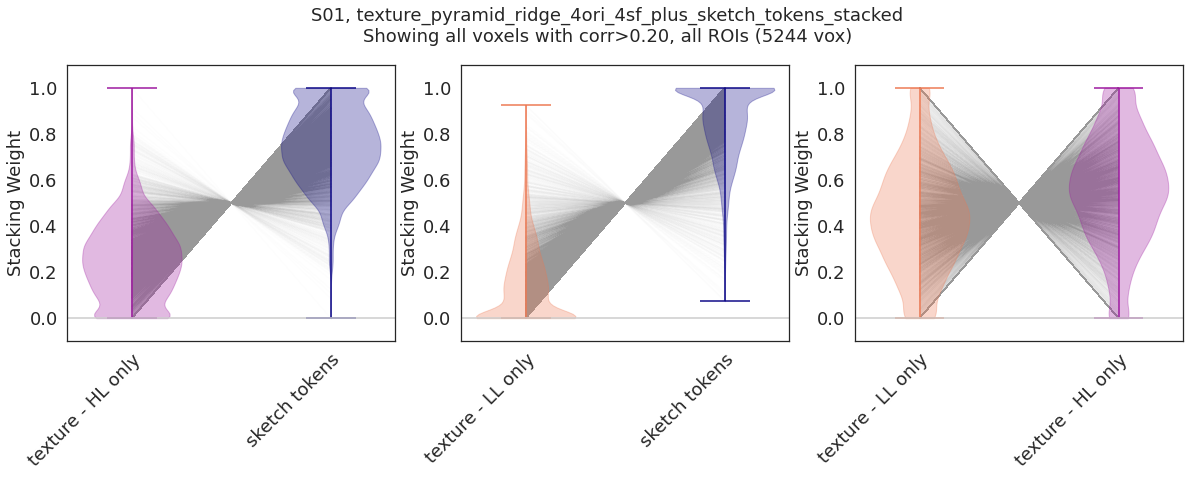

In [61]:
# Stacking weights: leave one out

plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']

colors = cm.plasma(np.linspace(0,1,len(stacking_names)+1))[0:-1]
colors = np.flipud(colors)


plt.figure(figsize=(20,8))

for lo in range(3):
    
    plt.subplot(1,3,lo+1)
    
    ppinds_use = list(np.copy(ppinds))
    ppinds_use.remove(ppinds_use[lo])
    stacking_names_use = list(np.copy(stacking_names))
    stacking_names_use.remove(stacking_names[lo])
#     stacking_names = [out['partial_version_names'][ppinds_use[ii]] for ii in range(len(ppinds_use))]

    stacking_weights = out['stack_result_lo'][lo][0]

    colors_use = np.copy(colors)
    colors_use = np.delete(colors_use, lo, axis=0)
  
    cc_cutoff = 0.20
    inds2use = out['stack_result'][4]>cc_cutoff

    vp = plot_utils.violin_plot(colors=colors_use, column_labels=stacking_names_use, ylabel='Stacking Weight',
                                                            horizontal_line_pos=0, ylims=[-0.1, 1.1])
    vp.create(data=stacking_weights[inds2use,:], new_fig=False)

    plt.plot(stacking_weights[inds2use,:].T,'-',color=[0.6, 0.6, 0.6],zorder=-100, alpha=0.01)
    
plt.suptitle('S%02d, %s\nShowing all voxels with corr>%.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                    cc_cutoff, np.sum(inds2use)));
plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_leaveout_violin.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'stacking_weights_leaveout_violin.png'))


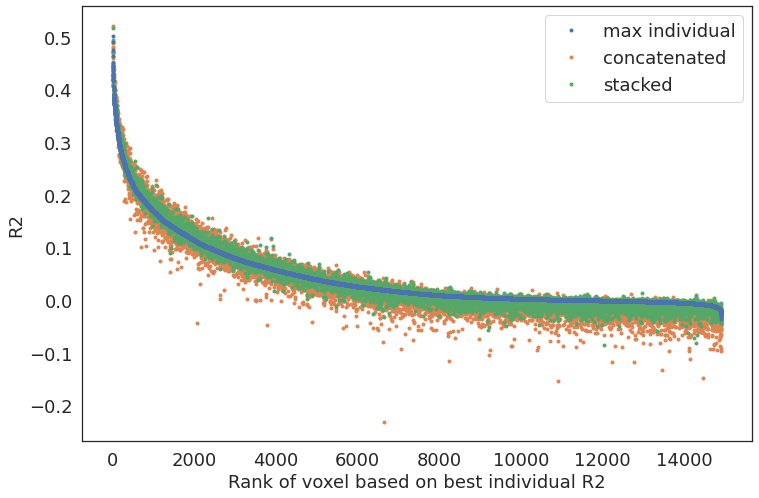

In [67]:
ppinds = out['partial_models_used_for_stack']
r2_indiv = out['val_r2']
r2_max_indiv = np.max(r2_indiv[:,ppinds], axis=1)
r2_concat = r2_indiv[:,0]
r2_stack = out['stack_result'][3]

sorder = np.flip(np.argsort(r2_max_indiv));

plt.figure(figsize=(12,8));
plt.plot(r2_max_indiv[sorder],'.')
plt.plot(r2_concat[sorder],'.',zorder=-100)
plt.plot(r2_stack[sorder],'.',zorder=-50)

plt.legend(['max individual','concatenated','stacked'])
plt.xlabel('Rank of voxel based on best individual R2')
plt.ylabel('R2')

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_r2_compare.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_r2_compare.png'))


In [65]:
ppinds

[2, 3, 6]

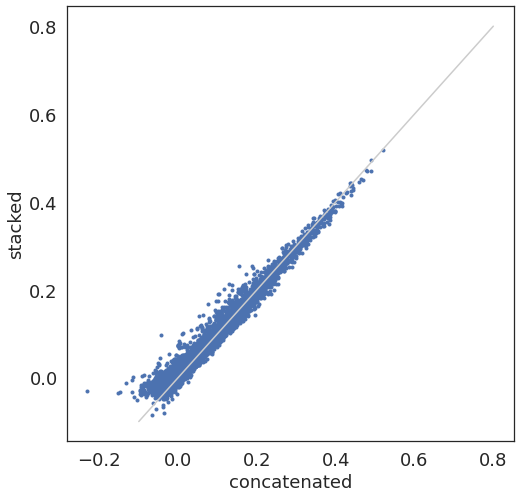

In [68]:
ppinds = out['partial_models_used_for_stack']
r2_indiv = out['val_r2']
r2_max_indiv = np.max(r2_indiv[:,ppinds], axis=1)
r2_concat = r2_indiv[:,0]
r2_stack = out['stack_result'][3]

ylims = [-0.1, 0.8]
xlims = [-0.1, 0.8]

plt.figure(figsize=(8,8));
plt.plot(r2_concat, r2_stack,'.')
plt.plot(ylims, xlims,'-',color=[0.8, 0.8, 0.8])
plt.xlabel('concatenated')
plt.ylabel('stacked')

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_r2_compare2.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_r2_compare2.png'))


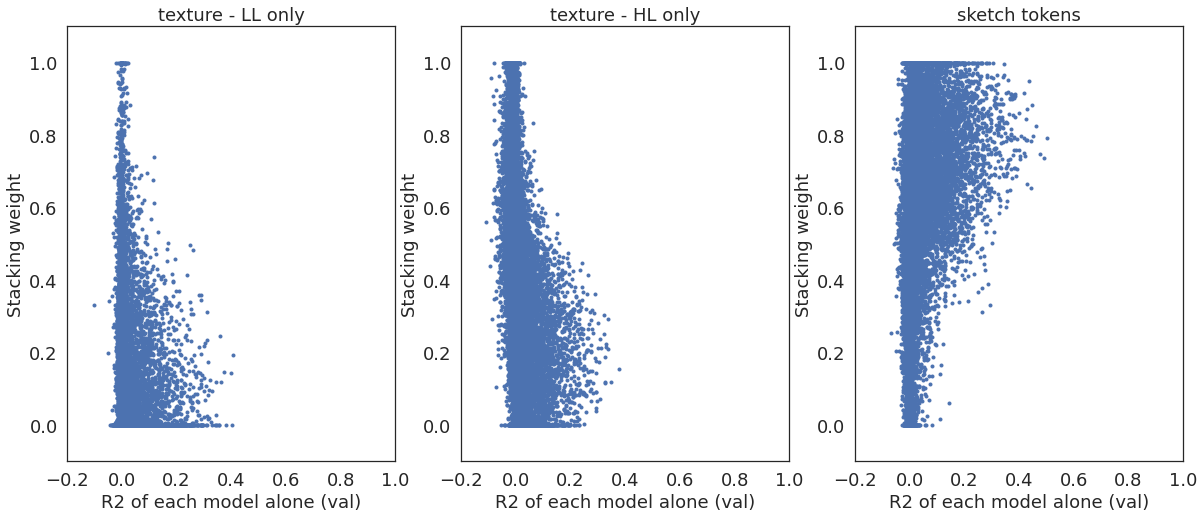

In [69]:
plot_utils.set_all_font_sizes(fs = 18)
val_cc_alone = out['val_cc'][:,ppinds]
val_r2_alone = out['val_r2'][:,ppinds]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']
S = out['stack_result'][0]

plt.figure(figsize=(20,8))
for ss in range(3):
    plt.subplot(1,3,ss+1)
#     plt.plot(val_cc_alone[:,ss], S[:,ss],'.')
    plt.plot(val_r2_alone[:,ss], S[:,ss],'.')
    plt.xlim([-0.2,1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('R2 of each model alone (val)')
    plt.ylabel('Stacking weight')
    plt.title(stacking_names[ss])

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_r2.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_r2.png'))
  

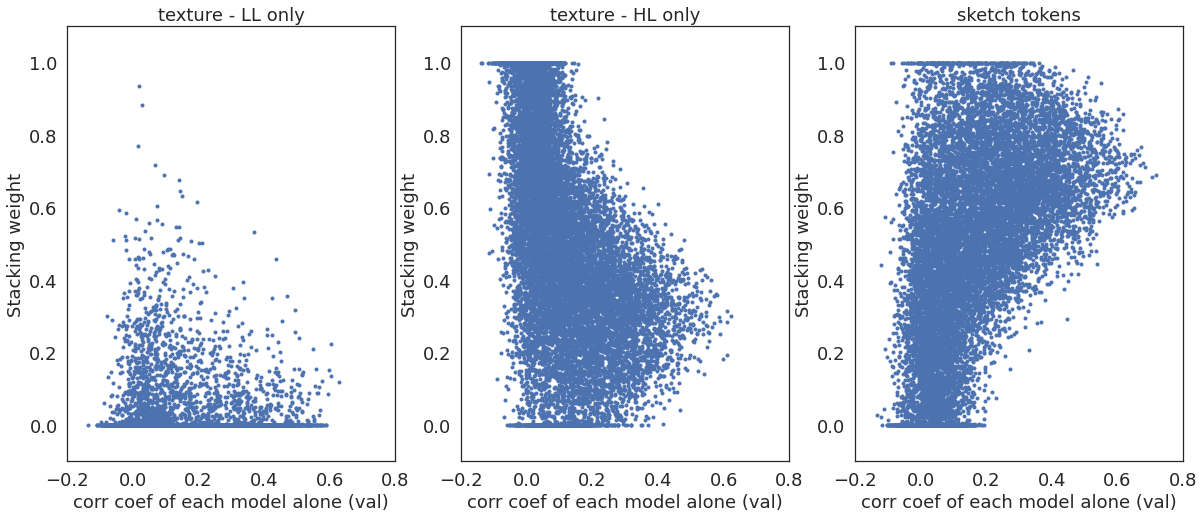

In [32]:
plot_utils.set_all_font_sizes(fs = 18)
val_cc_alone = out['val_cc'][:,ppinds]
val_r2_alone = out['val_r2'][:,ppinds]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']
S = out['stack_result'][0]

plt.figure(figsize=(20,8))
for ss in range(3):
    plt.subplot(1,3,ss+1)
    plt.plot(val_cc_alone[:,ss], S[:,ss],'.')
#     plt.plot(val_r2_alone[:,ss], S[:,ss],'.')
    plt.xlim([-0.2,0.8])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('corr coef of each model alone (val)')
    plt.ylabel('Stacking weight')
    plt.title(stacking_names[ss])

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_cc.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_cc.png'))
  

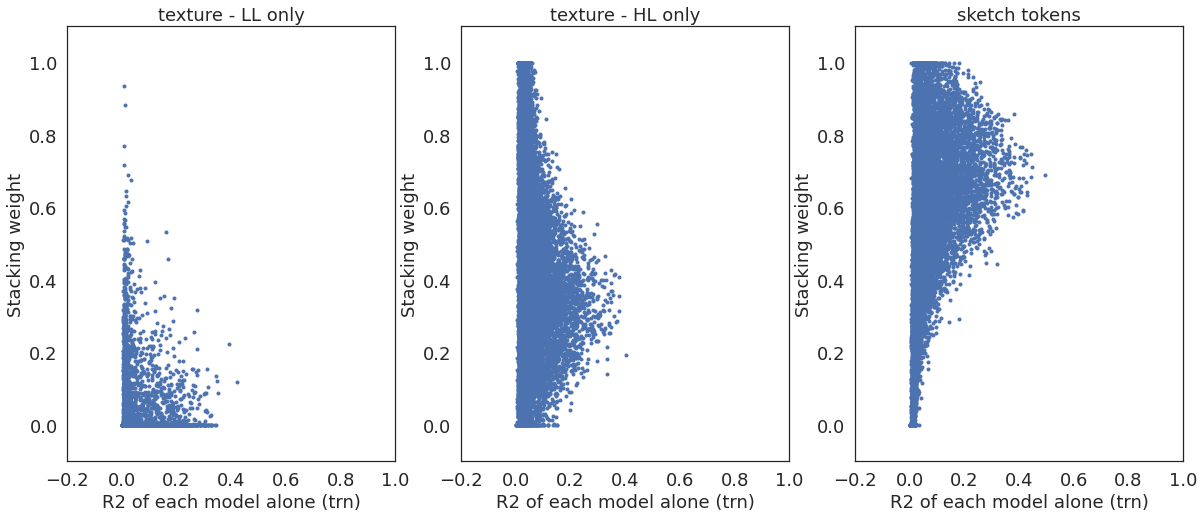

In [33]:
plot_utils.set_all_font_sizes(fs = 18)
# val_cc_alone = out['val_cc'][:,ppinds]
train_r2_alone = out['train_r2'][:,ppinds]
stacking_names = ['texture - LL only', 'texture - HL only', 'sketch tokens']
S = out['stack_result'][0]

plt.figure(figsize=(20,8))
for ss in range(3):
    plt.subplot(1,3,ss+1)
#     plt.plot(val_cc_alone[:,ss], S[:,ss],'.')
    plt.plot(train_r2_alone[:,ss], S[:,ss],'.')
    plt.xlim([-0.2,1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('R2 of each model alone (trn)')
    plt.ylabel('Stacking weight')
    plt.title(stacking_names[ss])

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_r2_trn.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'scatter_weights_r2_trn.png'))
  

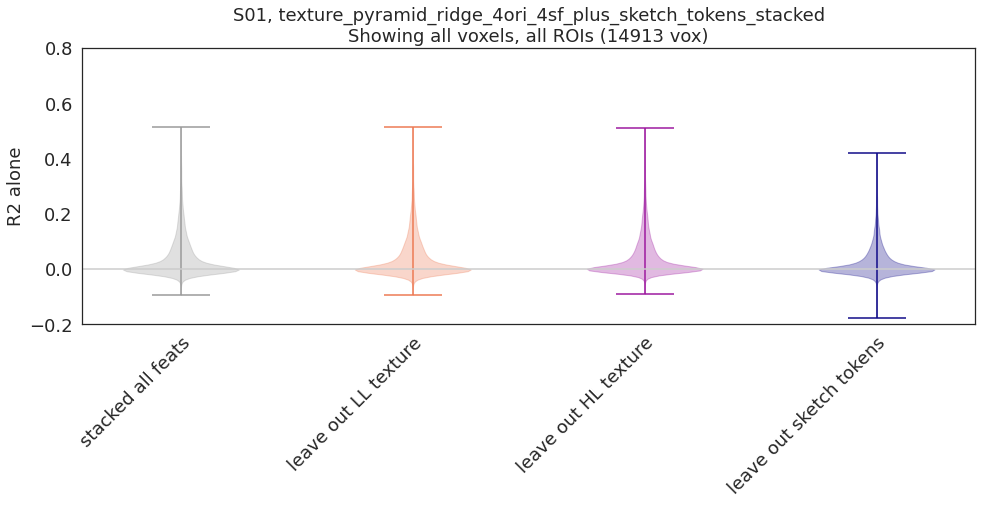

In [31]:
# Plotting R2 of the stacked models:

plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['stacked all feats','leave out LL texture', 'leave out HL texture', 'leave out sketch tokens']

vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
# vals_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)

# vals_r2 = np.sign(vals_cc)*vals_cc**2
colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)
colors = np.concatenate((np.array([[0.6, 0.6, 0.6, 1]]), colors[1:,:]), axis=0)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='R2 alone', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims = [-0.2, 0.8])
vp.create(data=vals_r2[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'R2_stacked_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'R2_stacked_violin_allrois.png'))
    


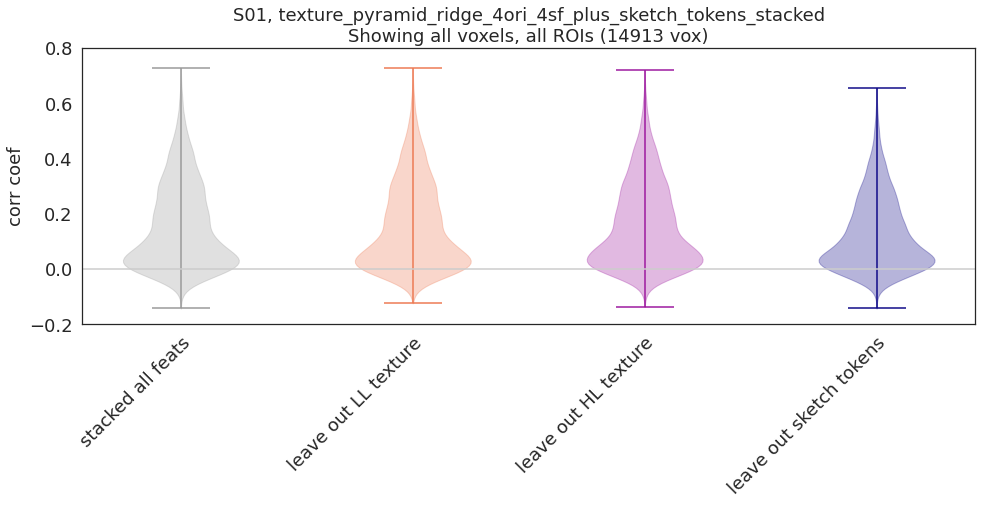

In [32]:
plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
stacking_names = ['stacked all feats','leave out LL texture', 'leave out HL texture', 'leave out sketch tokens']

# vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
vals_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)

colors = cm.plasma(np.linspace(0,1,len(stacking_names)))
colors = np.flipud(colors)
colors = np.concatenate((np.array([[0.6, 0.6, 0.6, 1]]), colors[1:,:]), axis=0)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=stacking_names, ylabel='corr coef', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.2, 0.8])
vp.create(data=vals_cc[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'corrcoef_stacked_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'corrcoef_stacked_violin_allrois.png'))
    


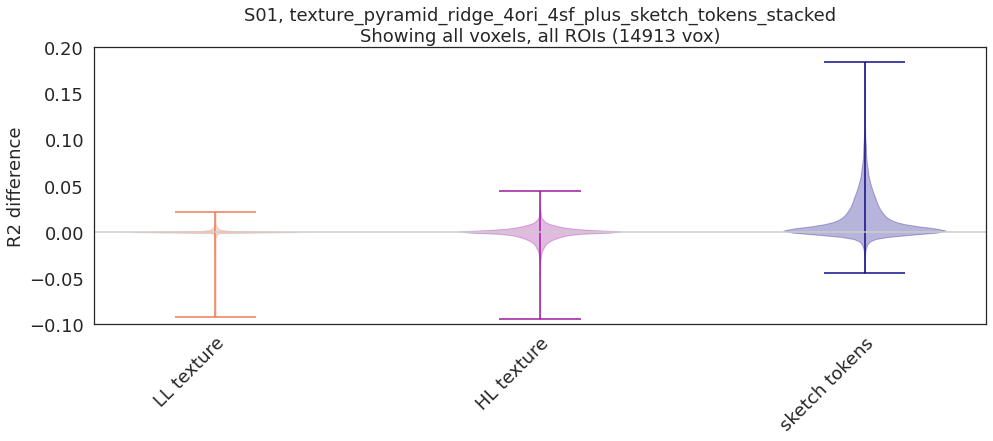

In [33]:
# Variance partition with stacking: unique var each model.

plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
ve_names = ['LL texture', 'HL texture', 'sketch tokens']

vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
# vals_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)

# vals_r2 = np.sign(vals_cc)*vals_cc**2

var_expl = vals_r2[:,0:1] - vals_r2[:,1:]

colors = cm.plasma(np.linspace(0,1,4))[0:-1]
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='R2 difference', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims = [-0.10, 0.2])
vp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'Varexpl_stacked_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'Varexpl_stacked_violin_allrois.png'))
    


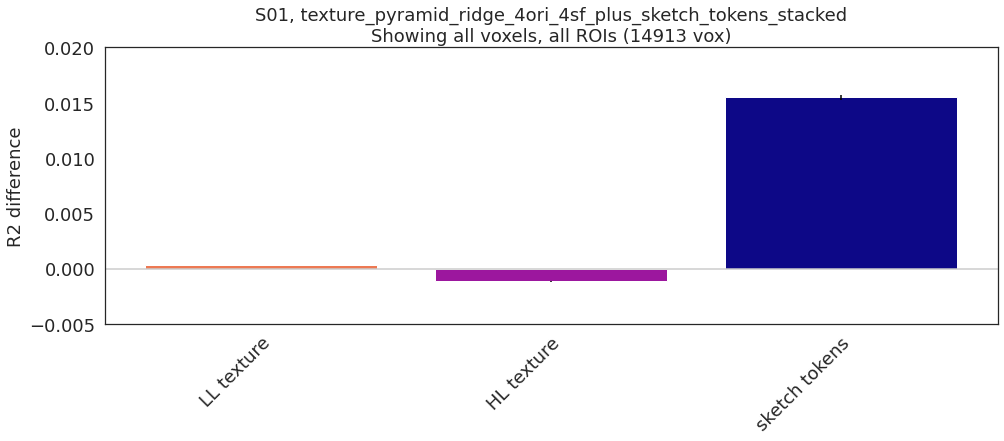

In [34]:
# Variance partition with stacking: unique var each model.

plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
ve_names = ['LL texture', 'HL texture', 'sketch tokens']

vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
# vals_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)

# vals_r2 = np.sign(vals_cc)*vals_cc**2

var_expl = vals_r2[:,0:1] - vals_r2[:,1:]

colors = cm.plasma(np.linspace(0,1,4))[0:-1]
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='R2 difference', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims = [-0.005, 0.02])
bp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'Varexpl_stacked_bar_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'Varexpl_stacked_bar_allrois.png'))
    


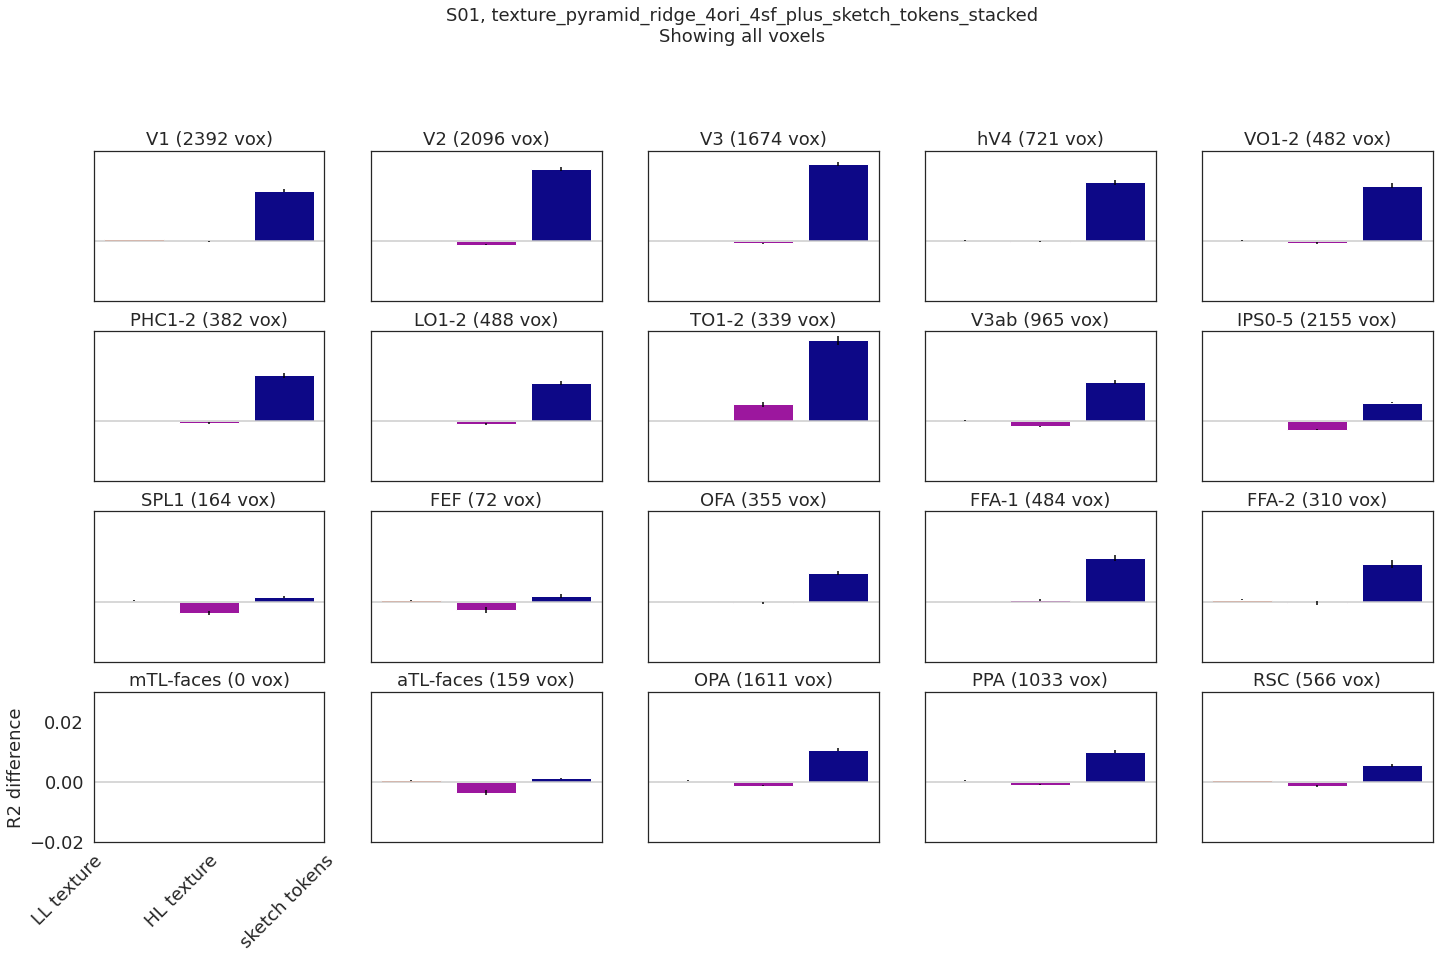

In [40]:
# Variance partition with stacking: unique var each model.

plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
ve_names = ['LL texture', 'HL texture', 'sketch tokens']

vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
# vals_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)

# vals_r2 = np.sign(vals_cc)*vals_cc**2

var_expl = vals_r2[:,0:1] - vals_r2[:,1:]

colors = cm.plasma(np.linspace(0,1,4))[0:-1]
colors = np.flipud(colors)

inds2use = np.ones(np.shape(vals_r2)[0])==1

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='R2 difference', \
                                                        horizontal_line_pos=0, ylims = [-0.02, 0.03])
plot_utils.create_roi_subplots(var_expl, inds2use, bp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.4)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'Varexpl_stacked_bar_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'Varexpl_stacked_bar_eachroi.png'))
    


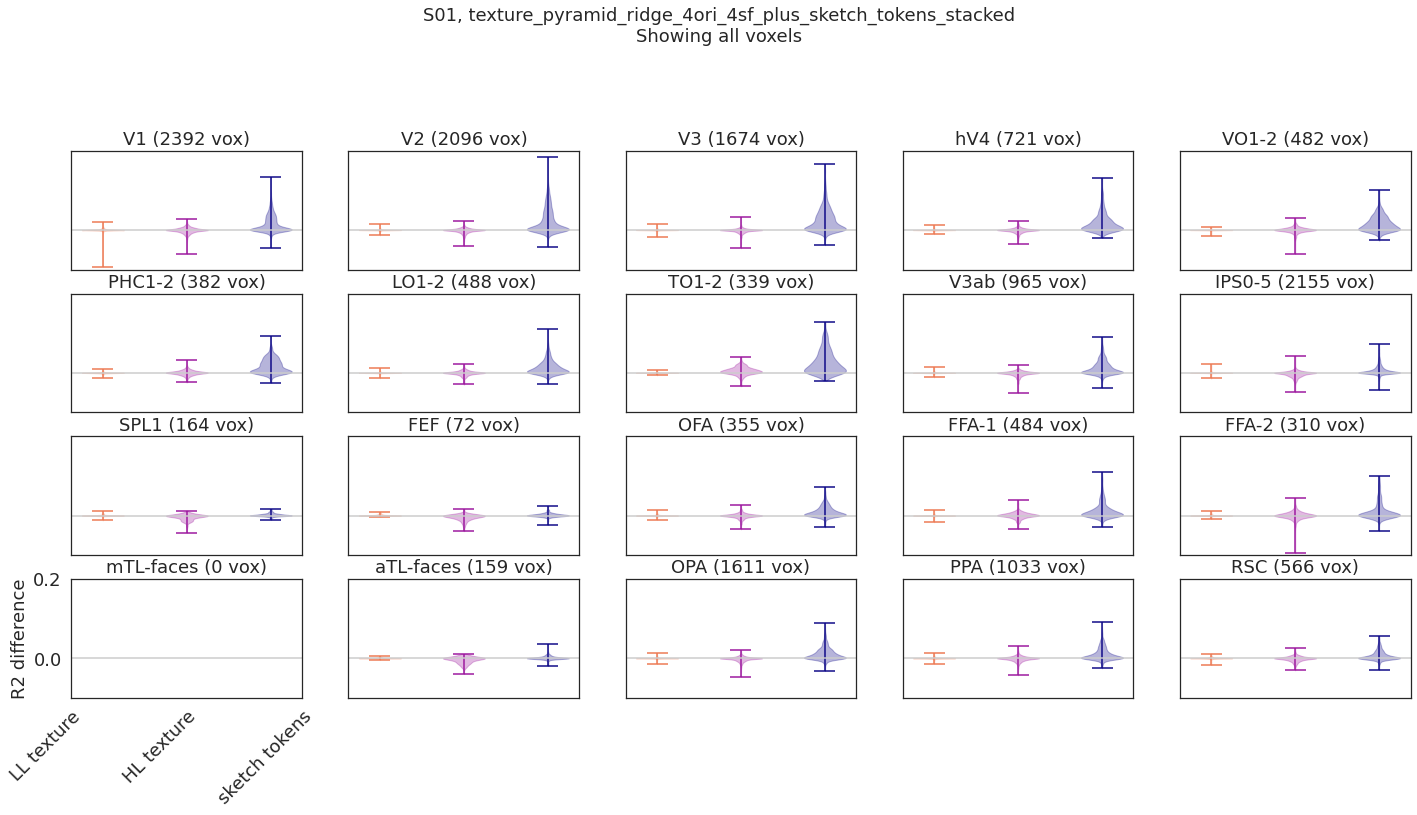

In [36]:
# Variance partition with stacking: unique var each model.

plot_utils.set_all_font_sizes(fs = 18)
ppinds = out['partial_models_used_for_stack']

# stacking_names = [out['partial_version_names'][ppinds[ii]] for ii in range(len(ppinds))]
ve_names = ['LL texture', 'HL texture', 'sketch tokens']

vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
# vals_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)

# vals_r2 = np.sign(vals_cc)*vals_cc**2

var_expl = vals_r2[:,0:1] - vals_r2[:,1:]

colors = cm.plasma(np.linspace(0,1,4))[0:-1]
colors = np.flipud(colors)

inds2use = np.ones(np.shape(stacking_weights)[0])==1

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='R2 difference', \
                                                        horizontal_line_pos=0, ylims = [-0.10, 0.2])
plot_utils.create_roi_subplots(var_expl, inds2use, vp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'Varexpl_stacked_violin_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'Varexpl_stacked_violin_eachroi.png'))
    


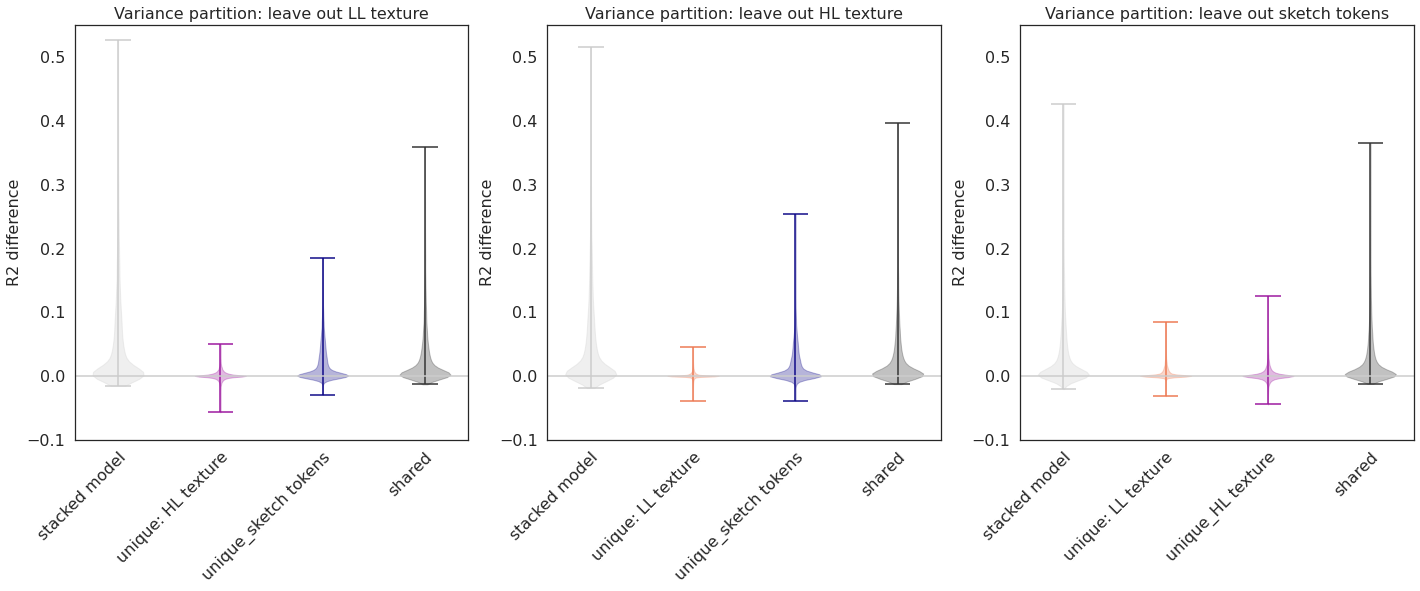

In [38]:
# Variance partition w stacking: pairwise combinations

plt.figure(figsize=(24,12))
plot_utils.set_all_font_sizes(fs = 16)

colors = cm.plasma(np.linspace(0,1,4))[0:-1]
colors = np.flipud(colors)

# stack_vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
stack_val_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)
stack_val_r2 = np.sign(stack_val_cc) * stack_val_cc**2
stacking_names = ['all feats','leave out LL texture', 'leave out HL texture', 'leave out sketch tokens']

ppinds = out['partial_models_used_for_stack']
solo_val_r2 = np.sign(out['val_cc'][:,ppinds]) * out['val_cc'][:,ppinds]**2
solo_names = ['LL texture', 'HL texture', 'sketch tokens']

inds2use = np.ones(np.shape(stack_val_r2)[0])==1

ppinds_use = [np.arange(3)[ppinds[lo]!=ppinds] for lo in range(3)]

for lo in range(3):
    
    plt.subplot(1,3,lo+1)

    pp1 = ppinds_use[lo][0]
    pp2 = ppinds_use[lo][1]
    shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(stack_val_r2[:,lo+1], \
                                                                         solo_val_r2[:,pp1], solo_val_r2[:,pp2])
    var_expl = np.concatenate((stack_val_r2[:,lo+1:lo+2], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

    ve_names = ['stacked model'] + ['unique: '+solo_names[pp1]] + ['unique_'+solo_names[pp2]] + ['shared']
    
    colors_use = np.concatenate((np.array([[0.8, 0.8, 0.8, 1]]), colors[ppinds_use[lo],:], \
                                 np.array([[0.2, 0.2, 0.2, 1]])), axis=0)
    
    vp = plot_utils.violin_plot(colors=colors_use, column_labels=ve_names, ylabel='R2 difference', \
                             title = 'Variance partition: %s'%stacking_names[lo+1],horizontal_line_pos=0, \
                                ylims = [-0.1, 0.55])
    vp.create(data=var_expl[inds2use,:], new_fig=False)

    plt.gcf().subplots_adjust(bottom=0.4)
    if fig_save_folder is not None:
        plt.savefig(os.path.join(fig_save_folder,'Varpart_lo_stacked_violin_allrois.pdf'))
        plt.savefig(os.path.join(fig_save_folder,'Varpart_lo_stacked_violin_allrois.png'))



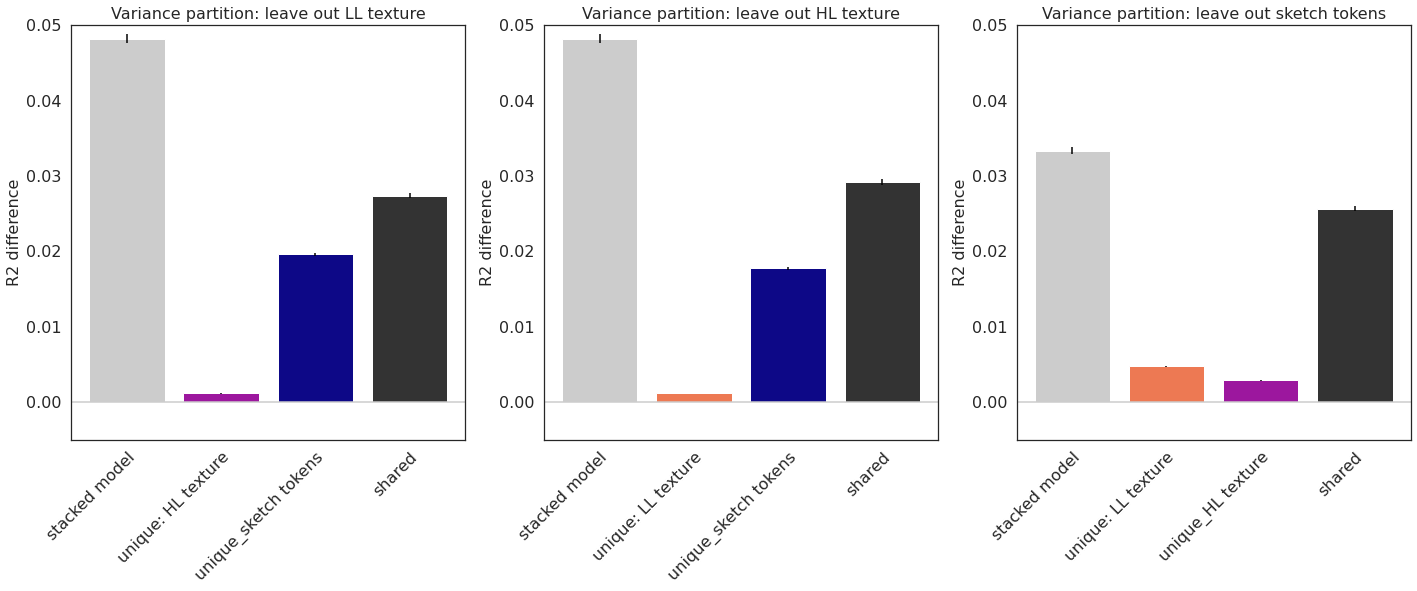

In [39]:
# Variance partition w stacking: pairwise combinations

plt.figure(figsize=(24,12))
plot_utils.set_all_font_sizes(fs = 16)

colors = cm.plasma(np.linspace(0,1,4))[0:-1]
colors = np.flipud(colors)

# stack_vals_r2 = np.concatenate((out['stack_result'][3][:,np.newaxis], \
#                        np.array([out['stack_result_lo'][pp][3] for pp in range(3)]).T), axis=1)
stack_val_cc = np.concatenate((out['stack_result'][4][:,np.newaxis], \
                       np.array([out['stack_result_lo'][pp][4] for pp in range(3)]).T), axis=1)
stack_val_r2 = np.sign(stack_val_cc) * stack_val_cc**2
stacking_names = ['all feats','leave out LL texture', 'leave out HL texture', 'leave out sketch tokens']

ppinds = out['partial_models_used_for_stack']
solo_val_r2 = np.sign(out['val_cc'][:,ppinds]) * out['val_cc'][:,ppinds]**2
solo_names = ['LL texture', 'HL texture', 'sketch tokens']

inds2use = np.ones(np.shape(stack_val_r2)[0])==1

ppinds_use = [np.arange(3)[ppinds[lo]!=ppinds] for lo in range(3)]

for lo in range(3):
    
    plt.subplot(1,3,lo+1)

    pp1 = ppinds_use[lo][0]
    pp2 = ppinds_use[lo][1]
    shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(stack_val_r2[:,lo+1], \
                                                                         solo_val_r2[:,pp1], solo_val_r2[:,pp2])
    var_expl = np.concatenate((stack_val_r2[:,lo+1:lo+2], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

    ve_names = ['stacked model'] + ['unique: '+solo_names[pp1]] + ['unique_'+solo_names[pp2]] + ['shared']
    
    colors_use = np.concatenate((np.array([[0.8, 0.8, 0.8, 1]]), colors[ppinds_use[lo],:], \
                                 np.array([[0.2, 0.2, 0.2, 1]])), axis=0)
    
    bp = plot_utils.bar_plot(colors=colors_use, column_labels=ve_names, ylabel='R2 difference', \
                             title = 'Variance partition: %s'%stacking_names[lo+1],horizontal_line_pos=0, ylims = [-0.005, 0.05])
    bp.create(data=var_expl[inds2use,:], new_fig=False)

    plt.gcf().subplots_adjust(bottom=0.4)
    if fig_save_folder is not None:
        plt.savefig(os.path.join(fig_save_folder,'Varpart_lo_stacked_bar_allrois.pdf'))
        plt.savefig(os.path.join(fig_save_folder,'Varpart_lo_stacked_bar_allrois.png'))



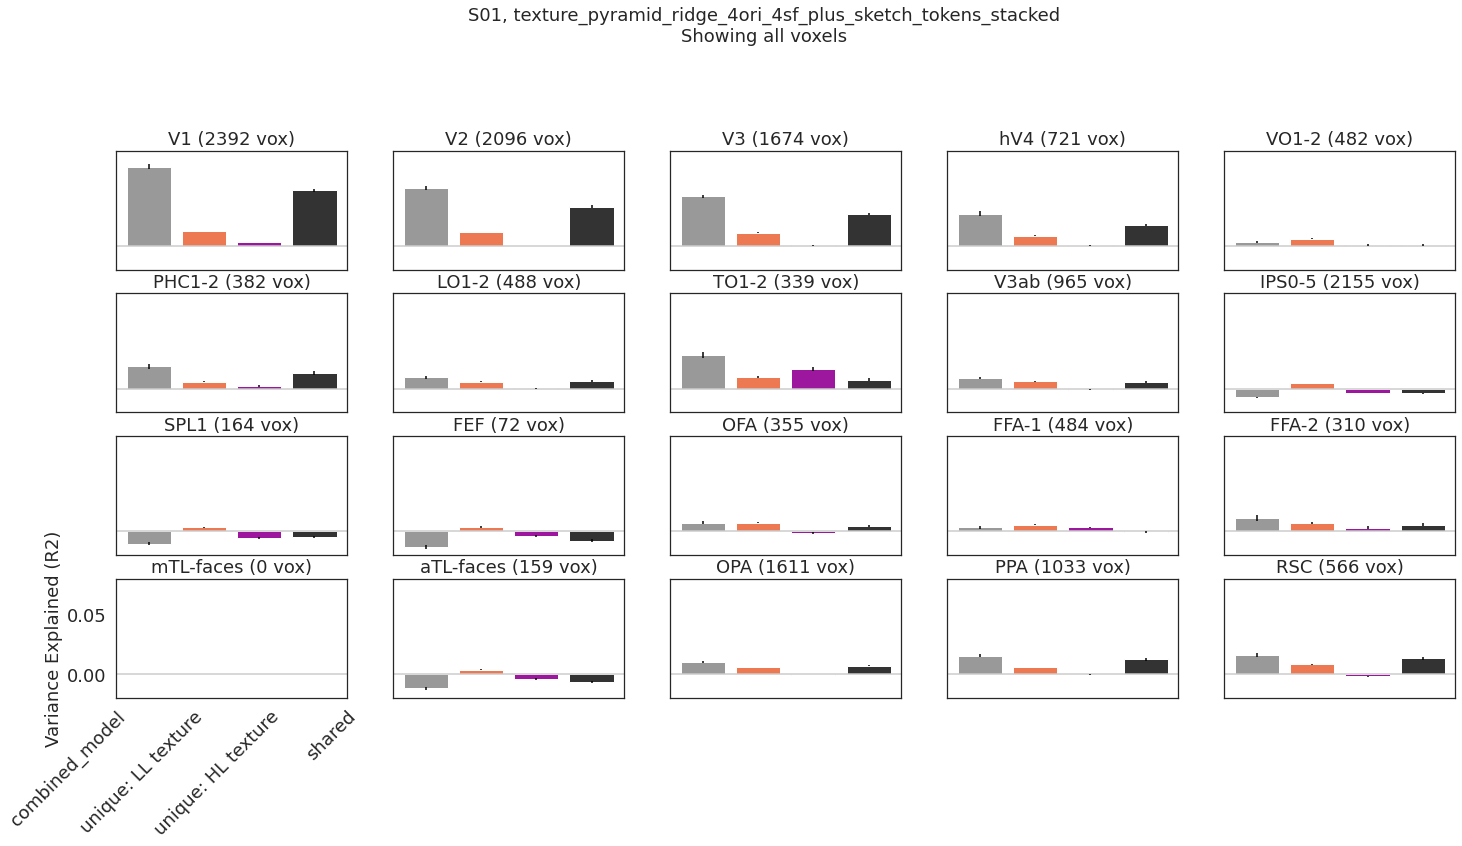

In [29]:
pp0 = 1
pp1 = 2
pp2 = 3

name1 = 'LL texture'
name2 = 'HL texture'
# name1 = out['partial_version_names'][pp1][5:]
# name2 = out['partial_version_names'][pp2][5:]
# val_r2 = analysis_utils.get_r2(out)
val_r2 = out['val_r2']
# val_r2 = np.sign(out['val_cc'])*out['val_cc']**2
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
# comb_texture_cc = out['stack_result_lo'][2][4]
# comb_texture_r2 = np.sign(comb_texture_cc)*comb_texture_cc**2
comb_texture_r2 = out['stack_result_lo'][2][3]
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(comb_texture_r2, val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)
colors = np.concatenate((np.array([[0.6, 0.6, 0.6, 1]]), colors[1:3,:], np.array([[0.2, 0.2, 0.2, 1]])), axis=0)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                                                        horizontal_line_pos=0, ylims=[-0.02, 0.08])
plot_utils.create_roi_subplots(var_expl, inds2use, bp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'Varpart_texture_LL_HL_stacked_bars_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'Varpart_texture_LL_HL_stacked_bars_eachroi.png'))